In [1]:
import torch
from ptbxlae.dataprocessing.ptbxlDS import PtbxlSmallSig
import matplotlib.pyplot as plt

* PTB-XL Autoencoder *


In [6]:
EXAMPLE_IDX = 980

ds = PtbxlSmallSig(root_folder="../data", seq_len=500)
sample = ds[EXAMPLE_IDX]
sample.shape

torch.Size([12, 500])

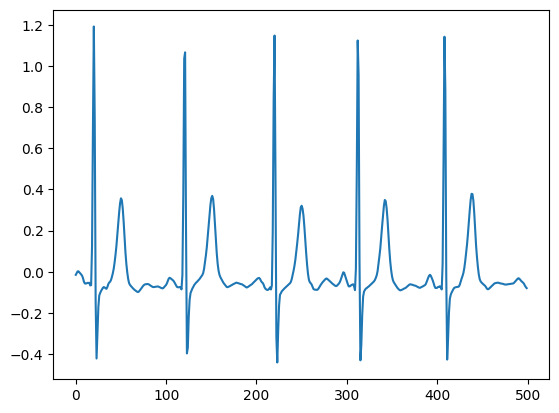

In [7]:
SAMPLE_CHANNEL = 10

plt.plot(range(0, sample.shape[-1]), sample[SAMPLE_CHANNEL,:])